## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [52]:
# 測試np.newaxis的使用
a = np.array([1,2,3,4,5])
b = a[:,np.newaxis]
print(a.shape)
print(b.shape)
print(b)
print(b[0])



(5,)
(5, 1)
[[1]
 [2]
 [3]
 [4]
 [5]]
[1]


In [86]:
dir(boston)
boston.feature_names[0]

'CRIM'

In [16]:
boston = datasets.load_boston()
print(boston['target'])
boston.feature_names
# we can see the target is continuous number, so this is a regression problems

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Data shape:  (506, 1)


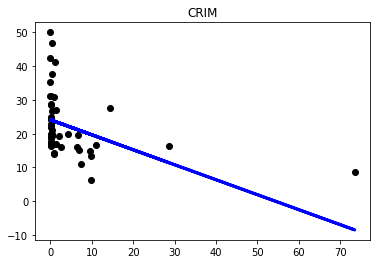

Coefficients:  [-0.44294703]
Mean squared error: 76.11
Data shape:  (506, 1)


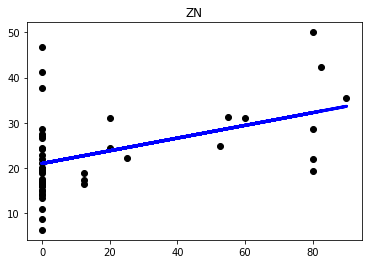

Coefficients:  [0.14048843]
Mean squared error: 63.78
Data shape:  (506, 1)


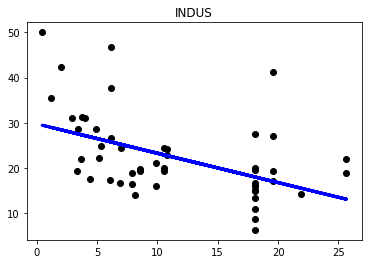

Coefficients:  [-0.64959885]
Mean squared error: 63.06
Data shape:  (506, 1)


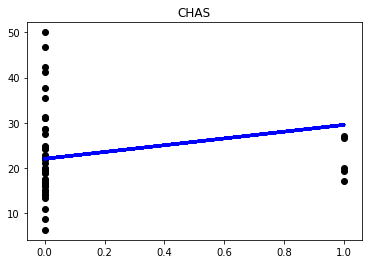

Coefficients:  [7.48533333]
Mean squared error: 88.06
Data shape:  (506, 1)


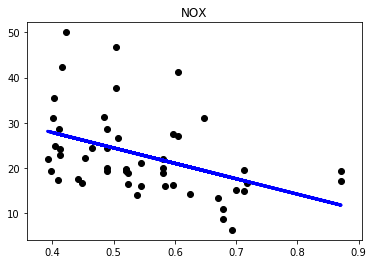

Coefficients:  [-34.09301439]
Mean squared error: 67.72
Data shape:  (506, 1)


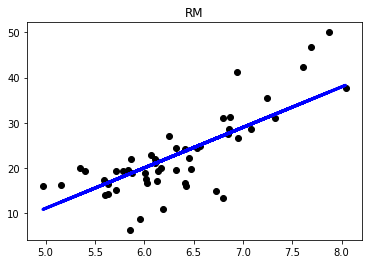

Coefficients:  [8.95430408]
Mean squared error: 32.40
Data shape:  (506, 1)


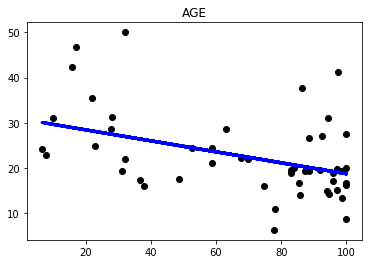

Coefficients:  [-0.12145796]
Mean squared error: 64.85
Data shape:  (506, 1)


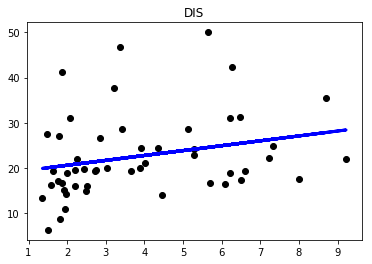

Coefficients:  [1.08133057]
Mean squared error: 75.82
Data shape:  (506, 1)


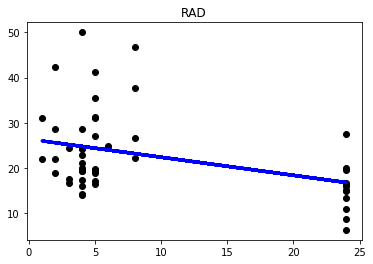

Coefficients:  [-0.40020672]
Mean squared error: 68.87
Data shape:  (506, 1)


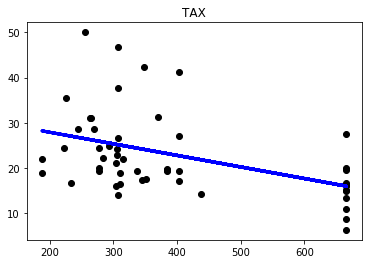

Coefficients:  [-0.02558027]
Mean squared error: 65.46
Data shape:  (506, 1)


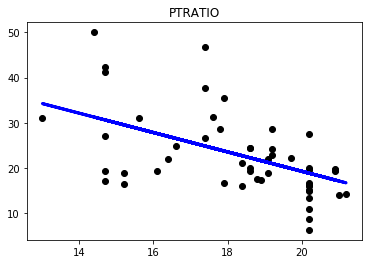

Coefficients:  [-2.13846286]
Mean squared error: 57.17
Data shape:  (506, 1)


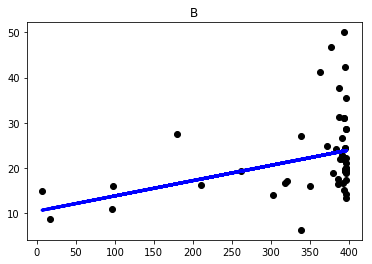

Coefficients:  [0.03381633]
Mean squared error: 72.46
Data shape:  (506, 1)


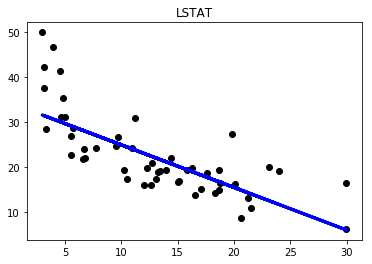

Coefficients:  [-0.94532598]
Mean squared error: 35.54


In [89]:
for i in range(13):
    # 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
    X = boston.data[:, np.newaxis, i]
    print("Data shape: ", X.shape) 

    # 切分訓練集/測試集
    x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=4)

    # 建立一個線性回歸模型
    regr = linear_model.LinearRegression()

    # 將訓練資料丟進去模型訓練
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
      

    # 預測值與實際值的差距，使用 MSE
   
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, y_pred, color='blue', linewidth=3)
    plt.title(boston.feature_names[i])
    plt.show()
    print('Coefficients: ', regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))